# **MULTI-CLASS CLASSIFICATION USING DIFFERENT INITIALIZATION TECHNIQUES**

* Importing necessary libraries
* Loading the dataset


In [1]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

# Assign column names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Map class labels to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class']))}
df['class'] = df['class'].map(class_mapping)

# Split data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# One-hot encode labels
y = np.eye(len(class_mapping))[y]

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

print(X.shape, y.shape)


(150, 4) (150, 3)


* Creating the Neural Network

In [2]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, weight_init):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_ih = weight_init((self.input_size, self.hidden_size))
        self.weights_ho = weight_init((self.hidden_size, self.output_size))
        self.bias_h = np.zeros((1, self.hidden_size))
        self.bias_o = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_ih) + self.bias_h
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_ho) + self.bias_o
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate):
        output_error = y - self.final_output
        output_delta = output_error * self.sigmoid_derivative(self.final_output)

        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_ho += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.weights_ih += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_o += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.bias_h += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)


* Different initialization techniques

In [6]:
def random_init(shape):
    return np.random.rand(*shape)

def xavier_init(shape):
    return np.random.randn(*shape) * np.sqrt(2 / (shape[0] + shape[1]))

def he_init(shape):
    return np.random.randn(*shape) * np.sqrt(2 / shape[0])


* Training the neural network on different initialiation techniques

In [7]:
input_size = X.shape[1]
hidden_size = 5
output_size = y.shape[1]
learning_rate = 0.01
epochs = 1000

# Random Initialization
nn_random = NeuralNetwork(input_size, hidden_size, output_size, random_init)
nn_random.train(X, y, epochs, learning_rate)

# Xavier Initialization
nn_xavier = NeuralNetwork(input_size, hidden_size, output_size, xavier_init)
nn_xavier.train(X, y, epochs, learning_rate)

# He Initialization
nn_he = NeuralNetwork(input_size, hidden_size, output_size, he_init)
nn_he.train(X, y, epochs, learning_rate)


Epoch [100/1000], Loss: 0.0978
Epoch [200/1000], Loss: 0.0642
Epoch [300/1000], Loss: 0.0402
Epoch [400/1000], Loss: 0.0269
Epoch [500/1000], Loss: 0.0207
Epoch [600/1000], Loss: 0.0174
Epoch [700/1000], Loss: 0.0155
Epoch [800/1000], Loss: 0.0142
Epoch [900/1000], Loss: 0.0133
Epoch [1000/1000], Loss: 0.0126
Epoch [100/1000], Loss: 0.0981
Epoch [200/1000], Loss: 0.0690
Epoch [300/1000], Loss: 0.0443
Epoch [400/1000], Loss: 0.0292
Epoch [500/1000], Loss: 0.0218
Epoch [600/1000], Loss: 0.0180
Epoch [700/1000], Loss: 0.0158
Epoch [800/1000], Loss: 0.0144
Epoch [900/1000], Loss: 0.0134
Epoch [1000/1000], Loss: 0.0127
Epoch [100/1000], Loss: 0.0827
Epoch [200/1000], Loss: 0.0496
Epoch [300/1000], Loss: 0.0305
Epoch [400/1000], Loss: 0.0221
Epoch [500/1000], Loss: 0.0181
Epoch [600/1000], Loss: 0.0158
Epoch [700/1000], Loss: 0.0144
Epoch [800/1000], Loss: 0.0134
Epoch [900/1000], Loss: 0.0126
Epoch [1000/1000], Loss: 0.0121


* Plotting the results

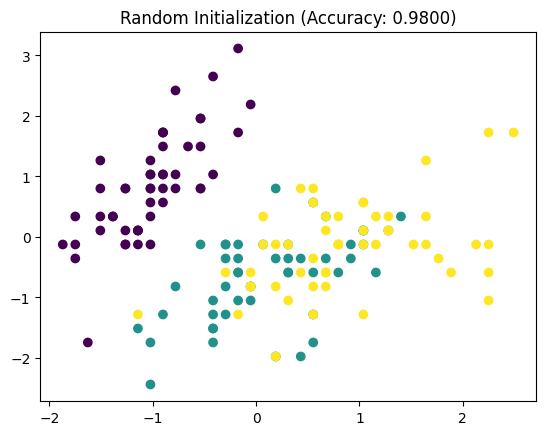

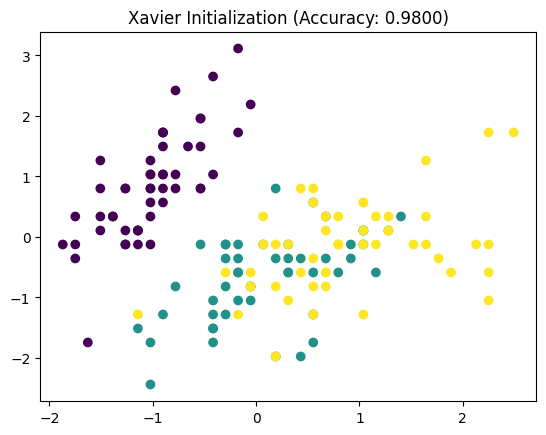

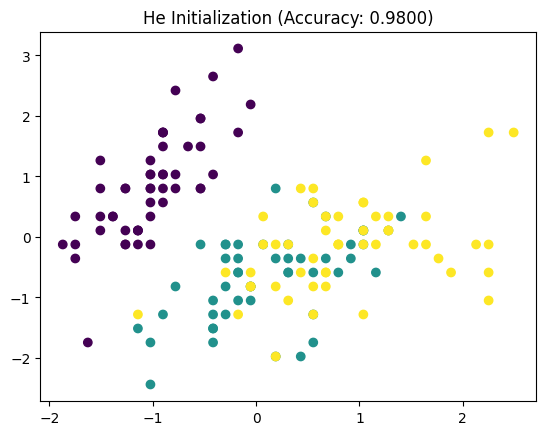

In [9]:
import matplotlib.pyplot as plt

def plot_results(nn, X, y, title):
    predictions = nn.predict(X)
    accuracy = np.mean(predictions == np.argmax(y, axis=1))
    plt.title(f'{title} (Accuracy: {accuracy:.4f})')
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis', marker='o')
    plt.show()

plot_results(nn_random, X, y, 'Random Initialization')
plot_results(nn_xavier, X, y, 'Xavier Initialization')
plot_results(nn_he, X, y, 'He Initialization')
